In [119]:
%matplotlib inline

In [120]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stat
import os

In [121]:
city_data_to_load = os.path.join('Resources','city_data.csv')
ride_data_to_load = os.path.join('Resources','ride_data.csv') 

In [122]:
# Read the city data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [123]:
# Read the ride data file and store it in a pandas DataFrame.

ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [124]:
# Number of nulls

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [125]:
# Number of nulls

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [126]:
# Data types each column

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [127]:
# Data types each column

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [128]:
# Get the unique values of the type of city.

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [129]:
# Get the number of data points from the Urban cities.

sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Suburban")
#sum(city_data_df["type"]=="Rural")

36

In [130]:
pyber_data_df = pd.merge(ride_data_df,city_data_df,on=['city','city'],how='left')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [131]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [132]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [133]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


# Ride Count per city and type

In [134]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [135]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Average Fare by city and type

In [136]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

# Average number of drivers by city and type

In [137]:
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

# Scatter Plots

## Urban Scatter

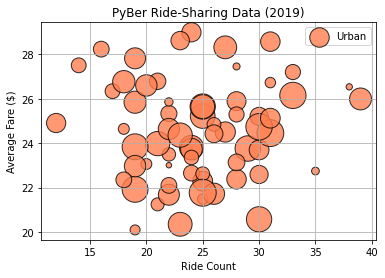

In [138]:
plt.scatter(urban_ride_count,
    urban_avg_fare,
    s= 10*urban_driver_count,
    color='coral',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Urban')

plt.title('PyBer Ride-Sharing Data (2019)')

plt.ylabel('Average Fare ($)')

plt.xlabel('Ride Count')

plt.grid(True)

plt.legend()

## Suburban Scatter

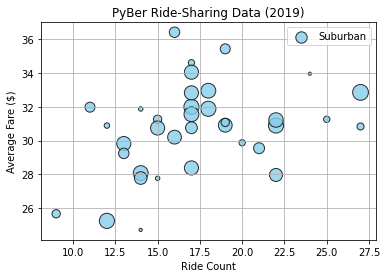

In [141]:
plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s= 10*suburban_driver_count,
    color='skyblue',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Suburban')

plt.title('PyBer Ride-Sharing Data (2019)')

plt.ylabel('Average Fare ($)')

plt.xlabel('Ride Count')

plt.grid(True)

plt.legend()

## Rural Scatter

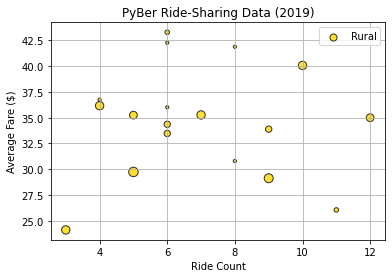

In [140]:
plt.scatter(rural_ride_count,
    rural_avg_fare,
    s= 10*rural_driver_count,
    color='gold',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')

plt.ylabel('Average Fare ($)')

plt.xlabel('Ride Count')

plt.grid(True)

plt.legend()

## Combination Scatter

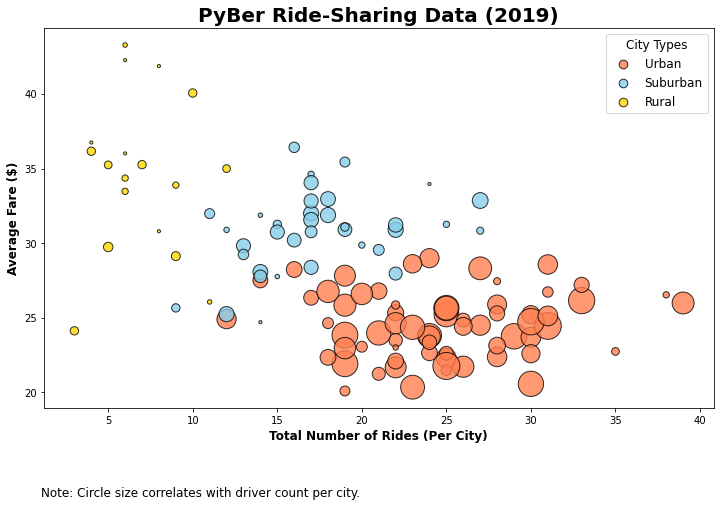

In [180]:

plt.subplots(figsize=(12,7))

plt.scatter(urban_ride_count,
    urban_avg_fare,
    s= 10*urban_driver_count,
    color='coral',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Urban')

plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s= 10*suburban_driver_count,
    color='skyblue',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Suburban')

plt.scatter(rural_ride_count,
    rural_avg_fare,
    s= 10*rural_driver_count,
    color='gold',
    edgecolor='black',
    linewidths=1,
    alpha=0.8,
    label='Rural')

plt.ylabel('Average Fare ($)',fontsize = 12,fontweight='bold')
plt.xlabel('Total Number of Rides (Per City)',fontsize=12,fontweight='bold')

plt.title('PyBer Ride-Sharing Data (2019)',fontsize=20,fontweight='bold')

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(1,13, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.show()